In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"사용 중인 장비: {device}")

사용 중인 장비: cuda


In [3]:
mnist_data = datasets.MNIST(root='./data',
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())

In [4]:
eda_loader = torch.utils.data.DataLoader(dataset=mnist_data,
                                         batch_size=128,
                                         shuffle=True)

In [5]:
images, labels = next(iter(eda_loader))

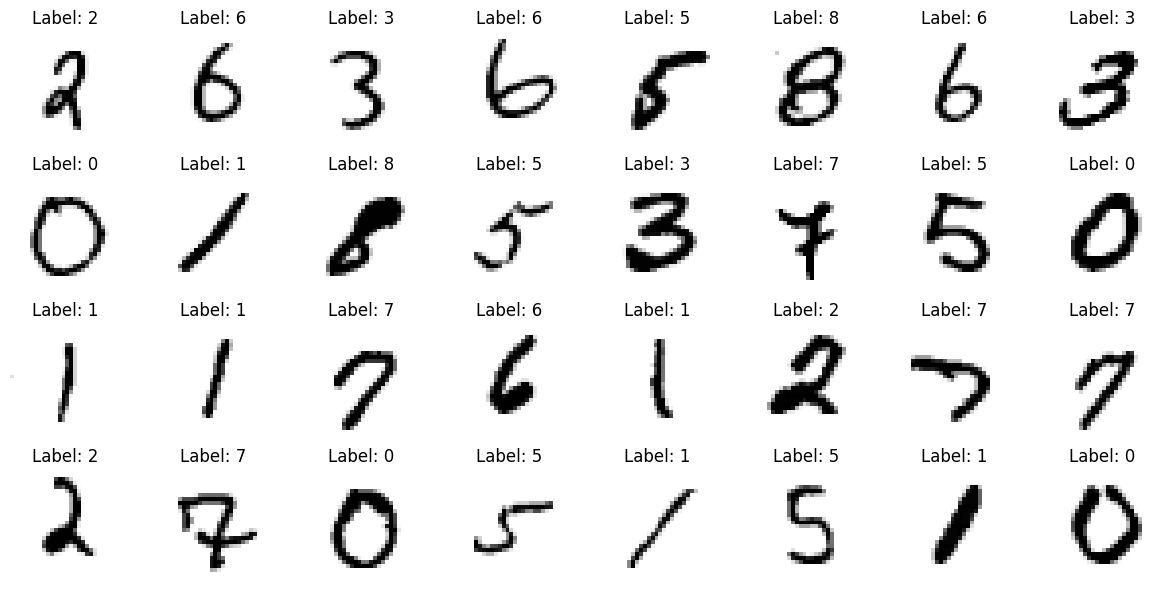

In [6]:
fig, axes = plt.subplots(4, 8, figsize=(12,6))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(), cmap='gray_r')
    ax.set_title(f'Label: {labels[i].item()}')
    ax.axis('off')

plt.tight_layout()
plt.show()

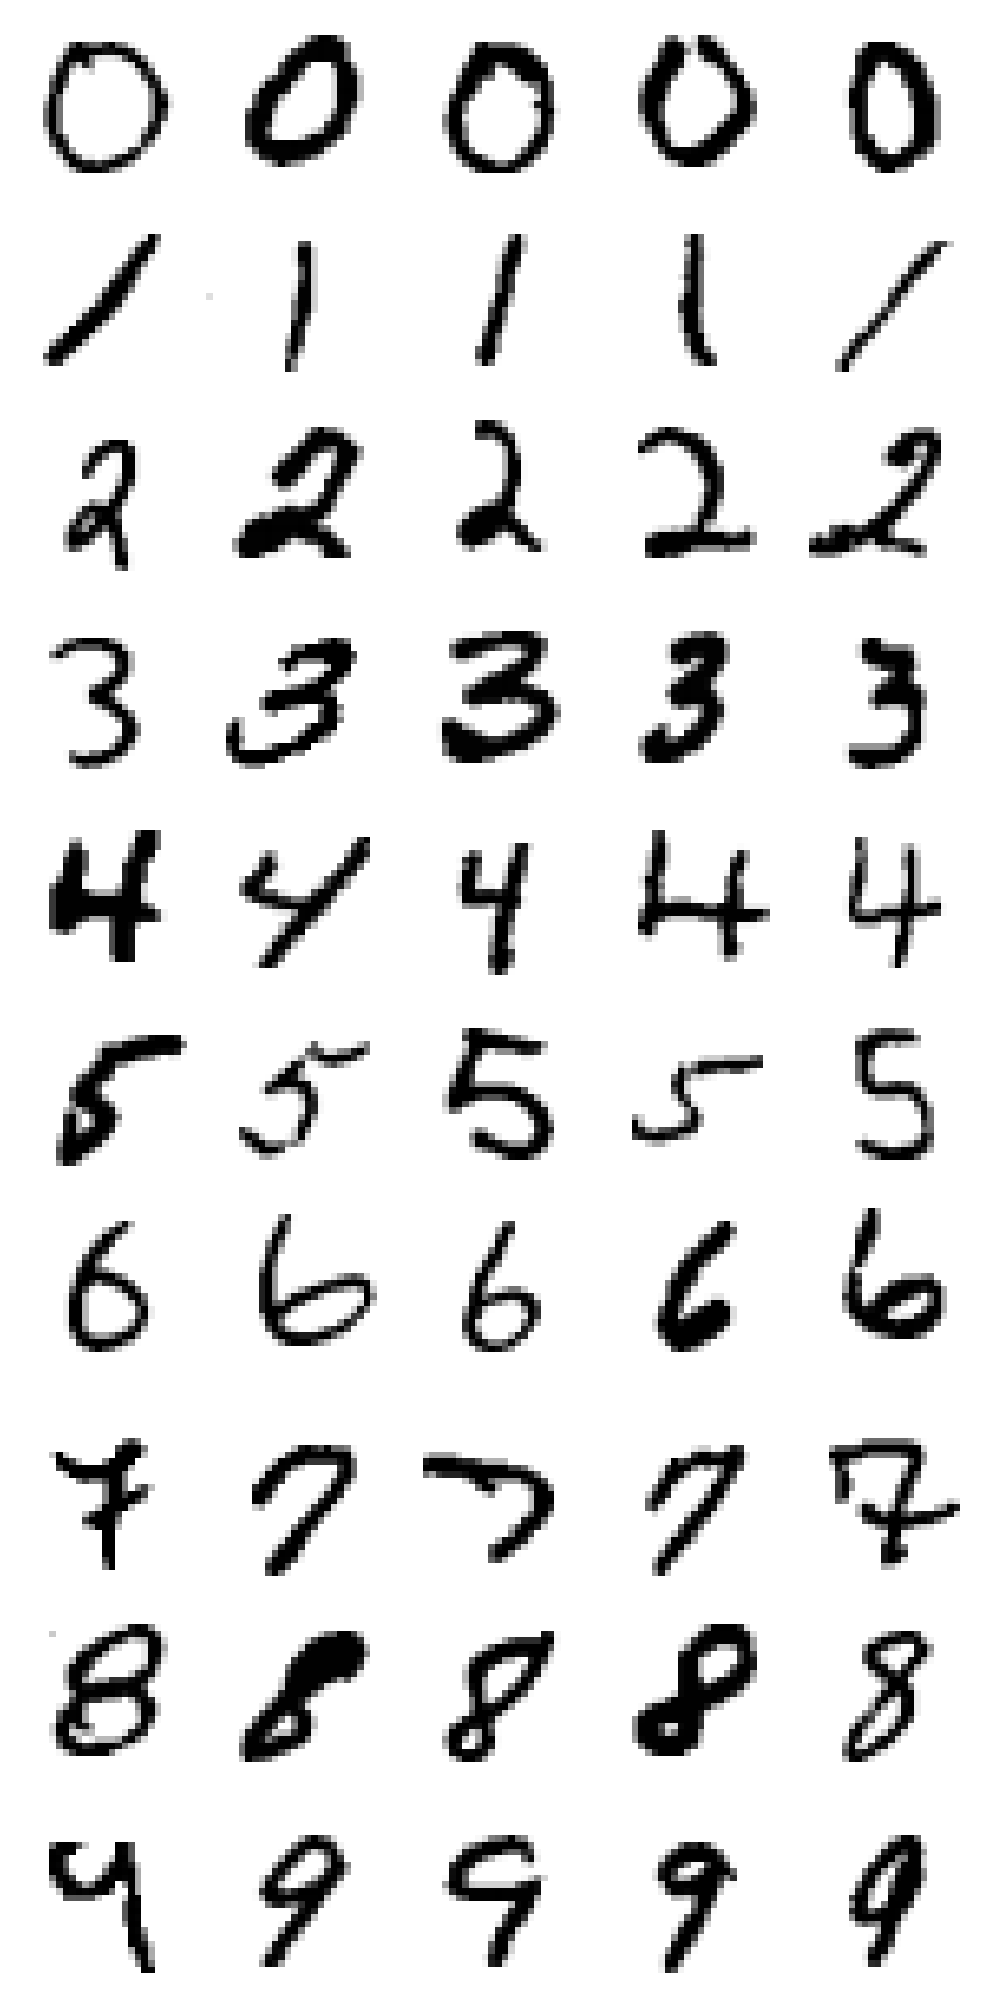

In [7]:
fig, axes = plt.subplots(10, 5, figsize=(10,20))

for digit in range(10):
    idxs = (labels == digit).nonzero().flatten()[:5]

    for i in range(5):
        ax = axes[digit, i]
        ax.imshow(images[idxs[i]].squeeze(), cmap='gray_r')
        ax.axis('off')

    if i == 2:
        ax.set_title(f'Number: {digit}', fontsize=12)

plt.tight_layout()
plt.show()

In [8]:
torch.Size([1, 28, 28])

torch.Size([1, 28, 28])

In [9]:
images[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

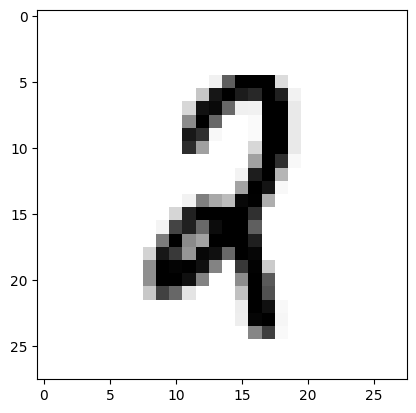

In [10]:
plt.imshow(images[0].squeeze(), cmap='gray_r')

In [11]:
model = nn.Sequential(
    nn.Linear(784, 1024),
    nn.BatchNorm1d(1024),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(1024, 512),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(512, 256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(256, 10)
)    

In [12]:
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=1024, bias=True)
  (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=1024, out_features=512, bias=True)
  (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=256, bias=True)
  (9): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): Dropout(p=0.5, inplace=False)
  (12): Linear(in_features=256, out_features=10, bias=True)
)

In [13]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        if layer.out_features == 10:
            nn.init.xavier_uniform_(layer.weight)
        else:
            nn.init.kaiming_uniform_(layer.weight, nonlinearity='relu')

        nn.init.zeros_(layer.bias)

In [14]:
model.apply(init_weights)

Sequential(
  (0): Linear(in_features=784, out_features=1024, bias=True)
  (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=1024, out_features=512, bias=True)
  (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=256, bias=True)
  (9): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): Dropout(p=0.5, inplace=False)
  (12): Linear(in_features=256, out_features=10, bias=True)
)

In [15]:
criterion = nn.CrossEntropyLoss()

In [16]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [17]:
train_loader = torch.utils.data.DataLoader(dataset=mnist_data,
                                          batch_size=2048,
                                          shuffle=True)

In [18]:
epochs = 30

for epoch in range(epochs):
    total_loss = 0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        batch_X = batch_X.view(-1, 28*28)

        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)

        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)

        print(f'Epoch [{epoch+1}/{epochs}], 평균 손실: {avg_loss:.4f}')

Epoch [1/30], 평균 손실: 0.1057
Epoch [1/30], 평균 손실: 0.1895
Epoch [1/30], 평균 손실: 0.2578
Epoch [1/30], 평균 손실: 0.3151
Epoch [1/30], 평균 손실: 0.3662
Epoch [1/30], 평균 손실: 0.4108
Epoch [1/30], 평균 손실: 0.4493
Epoch [1/30], 평균 손실: 0.4848
Epoch [1/30], 평균 손실: 0.5177
Epoch [1/30], 평균 손실: 0.5469
Epoch [1/30], 평균 손실: 0.5755
Epoch [1/30], 평균 손실: 0.6007
Epoch [1/30], 평균 손실: 0.6266
Epoch [1/30], 평균 손실: 0.6495
Epoch [1/30], 평균 손실: 0.6710
Epoch [1/30], 평균 손실: 0.6929
Epoch [1/30], 평균 손실: 0.7144
Epoch [1/30], 평균 손실: 0.7341
Epoch [1/30], 평균 손실: 0.7526
Epoch [1/30], 평균 손실: 0.7712
Epoch [1/30], 평균 손실: 0.7885
Epoch [1/30], 평균 손실: 0.8056
Epoch [1/30], 평균 손실: 0.8221
Epoch [1/30], 평균 손실: 0.8395
Epoch [1/30], 평균 손실: 0.8549
Epoch [1/30], 평균 손실: 0.8689
Epoch [1/30], 평균 손실: 0.8835
Epoch [1/30], 평균 손실: 0.8974
Epoch [1/30], 평균 손실: 0.9114
Epoch [1/30], 평균 손실: 0.9244
Epoch [2/30], 평균 손실: 0.0128
Epoch [2/30], 평균 손실: 0.0263
Epoch [2/30], 평균 손실: 0.0395
Epoch [2/30], 평균 손실: 0.0523
Epoch [2/30], 평균 손실: 0.0651
Epoch [2/30], 평균 손실:

In [19]:
test_data = datasets.MNIST(root='./data',
                           train=False,
                           download=True,
                           transform=transforms.ToTensor())

In [20]:
test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                          batch_size=2048,
                                          shuffle=False)

In [21]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)

        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [22]:
accuracy = 100 * correct / total
print(f'전체 테스트에 대한 정확도: {accuracy:.2f}%')

전체 테스트에 대한 정확도: 98.47%


In [23]:
visual_loader = torch.utils.data.DataLoader(dataset=test_data,
                                            batch_size=32,
                                            shuffle=True)

In [24]:
images_32, labels_32 = next(iter(visual_loader))

In [25]:
images_flat_32 = images_32.view(-1, 28*28)
images_flat_32 = images_flat_32.to(device)

In [26]:
with torch.no_grad():
    outputs_32 = model(images_flat_32)
    _, predicted_32 = torch.max(outputs_32, 1)

In [27]:
images_32 = images_32.cpu()

In [28]:
predicted_32 = predicted_32.cpu()

In [29]:
labels_32 = labels_32.cpu()

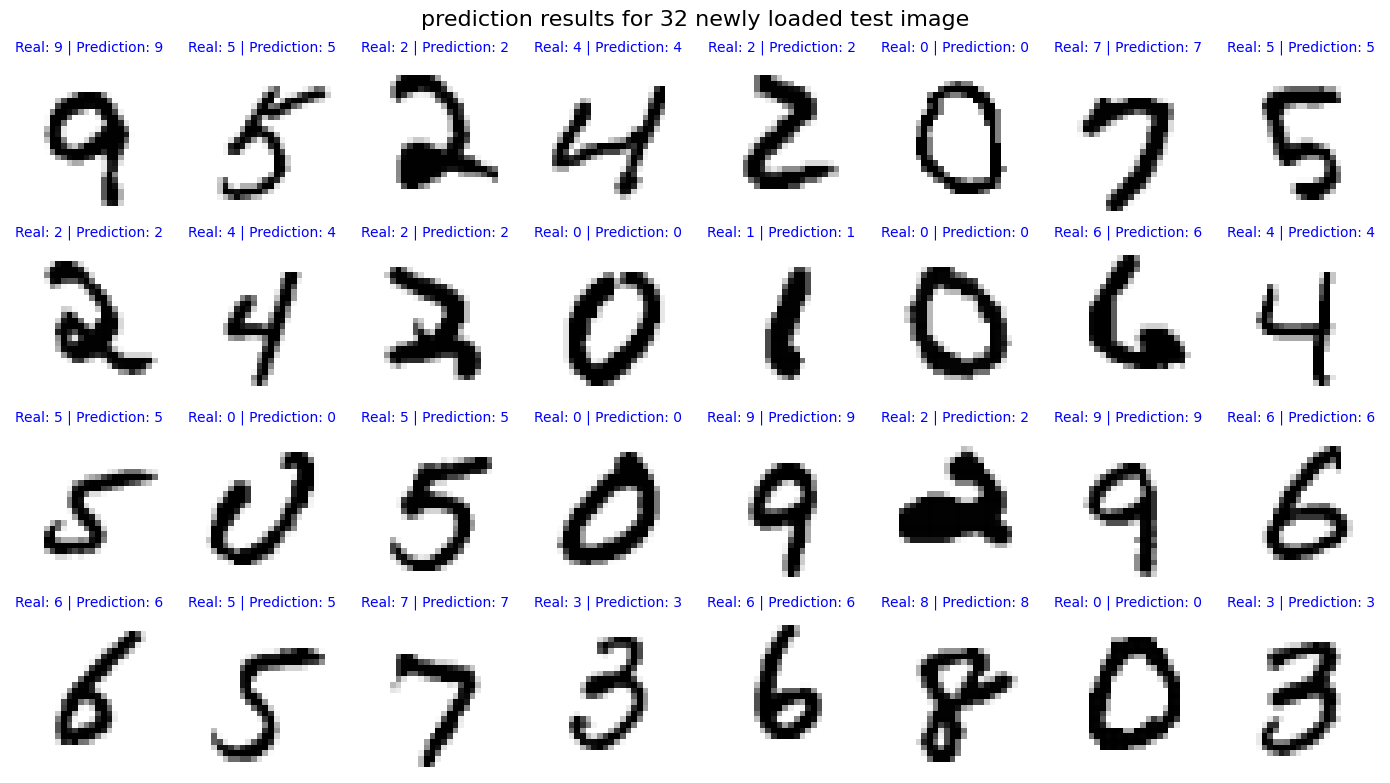

In [30]:
fig, axes = plt.subplots(4, 8, figsize=(14, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(images_32[i].squeeze(), cmap='gray_r')
    ax.axis('off')

    true_label = labels_32[i].item()
    pred_label = predicted_32[i].item()

    ax.set_title(f'Real: {true_label} | Prediction: {pred_label}', fontsize=10, color='blue' if true_label==pred_label else 'red')

plt.suptitle('prediction results for 32 newly loaded test image', fontsize=16)
plt.tight_layout()
plt.show()